In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#imports stats packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 200)

In [2]:
#read data from computer data files system 
data= pd.read_csv('Automobile_data.csv')

In [3]:
#display data -overview of data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Part one
##### Data cleaning


From the data set, we can see there are some weird symblos , these need to be deal with, first we need to see how many unkwown data are in ther

In [4]:
#find if there is missing data
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
#find unique data from datafile, to determine unreconized data
unique_names = list(data.columns)
for uni_names in unique_names:
    #data_printed = [[uni_names, len(data[data[uni_names]=='?'])]]
    data_values =(len(data[data[uni_names] == '?']))
    
    #create data frame
    data_unique = [uni_names, data_values]
    print(data_unique)
#print(pd.DataFrame(data_unique,columns =['Variable_names', '? Counts']))
    
    


['symboling', 0]
['normalized-losses', 41]
['make', 0]
['fuel-type', 0]
['aspiration', 0]
['num-of-doors', 2]
['body-style', 0]
['drive-wheels', 0]
['engine-location', 0]
['wheel-base', 0]
['length', 0]
['width', 0]
['height', 0]
['curb-weight', 0]
['engine-type', 0]
['num-of-cylinders', 0]
['engine-size', 0]
['fuel-system', 0]
['bore', 4]
['stroke', 4]
['compression-ratio', 0]
['horsepower', 2]
['peak-rpm', 2]
['city-mpg', 0]
['highway-mpg', 0]
['price', 4]


#count number of "?" character per variable.
names = list(data.columns)
for uni_names in names:
    print(data[uni_names])

In [6]:
#transform all ? to Nan
data = data.replace('?', np.nan)

In [7]:
# replace Normalized Data
data.loc[data['normalized-losses'].isnull()].count()

symboling            41
normalized-losses     0
make                 41
fuel-type            41
aspiration           41
num-of-doors         40
body-style           41
drive-wheels         41
engine-location      41
wheel-base           41
length               41
width                41
height               41
curb-weight          41
engine-type          41
num-of-cylinders     41
engine-size          41
fuel-system          41
bore                 41
stroke               41
compression-ratio    41
horsepower           39
peak-rpm             39
city-mpg             41
highway-mpg          41
price                37
dtype: int64

In [8]:
data['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
#data cleaning
#start with firt column -normalized-losses
#check number of Nan data in normalized-losses
data['normalized-losses'].isna().sum()


41

In [10]:
#find al non lossse and find its mean
non_nan_value_loss = data.loc[data['normalized-losses'].notnull()]
Mean_value_norm_losses = non_nan_value_loss['normalized-losses'].astype(int).mean()


#replace all nan values in ['normalized-losses'] by mean value
data['normalized-losses']= data['normalized-losses'].replace(np.nan,Mean_value_norm_losses).astype(int)

In [11]:
#chech if there is any nan values in normalized-losses

data['normalized-losses'].isna().sum()

0

In [12]:
#number of door variable has two nan values 
data['num-of-doors'].isna().sum()

2

In [13]:
#see which mode of car has no number of door registered

data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [14]:
#two make, mazda and Dodge .....
# start with Dodge
#pull all data for Dodge to find if there is one with same characters

data.loc[(data['make']=='dodge') & (data['body-style']=='sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [15]:
#from dataframe above, we can seee that, all dodge , sedan body type have four number of doors.
#replace nan value in dodge with four number of doors

data.at[27, 'num-of-doors']='four'

data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
63,0,122,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [16]:
#deal with mazda
#select fro data frame, make= mazda and model =sedan

data[(data['make']=='mazda') & (data['body-style']=='sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
60,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
63,0,122,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
66,0,122,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In [17]:
#from data frame we can see, all mazda , sedan body style have four number of doors
#replac nan value with four

data.at[63, 'num-of-doors']='four'

In [18]:
#deal with missing data in bore 
data[data['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [19]:
data[data['make']=='mazda']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


#In a piston engine, the bore (or cylinder bore) is the diameter of each cylinder.

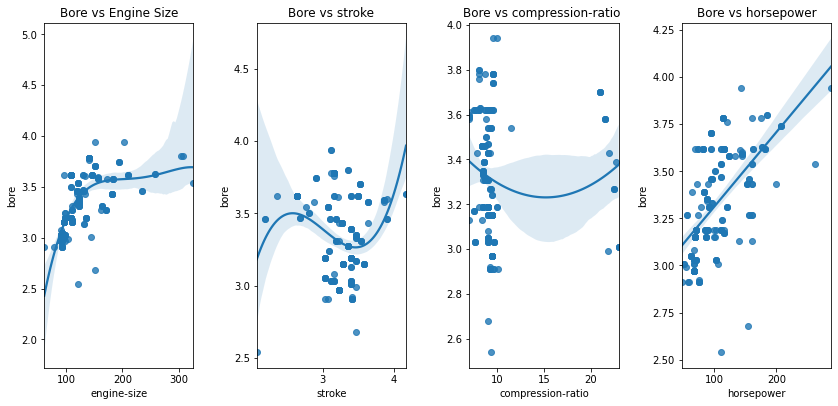

In [20]:
# bore size depends on engine diplacement and number of cylinder and stroke which some of the data we dont have
#we use engine size and stroke to look relationship btwn stroke and engine size
#data selected are those with no nan values

plot_data =data[data["bore"].notnull()] #select all the data with no nan value in bore variable
#figure  relative positioning 
plt.figure(figsize=(12,6))
plt.tight_layout(pad=2, h_pad=2, w_pad=2)

#figure plotting

#1 Bore vs Engine Size
plt.subplot(1,4,1)
sns.regplot(data=plot_data, x='engine-size', y=pd.to_numeric(plot_data['bore']), order=4)
plt.title('Bore vs Engine Size')



#2 plot Bore vs stroke
plt.subplot(1,4,2)
sns.regplot(data= plot_data, x=pd.to_numeric(plot_data['stroke']),
                                             y=pd.to_numeric(plot_data['bore']), order =3)
plt.title('Bore vs stroke')


#3plot Bore vs compression-ratio 
plt.subplot(1,4,3)
sns.regplot(data = plot_data, x= pd.to_numeric(plot_data['compression-ratio']), 
            y=pd.to_numeric(plot_data['bore']), order =2)
plt.title('Bore vs compression-ratio ')

#4 plot Bore vs horsepower
plt.subplot(1,4,4)
sns.regplot(data = plot_data, x= pd.to_numeric(plot_data['horsepower']),
            y=pd.to_numeric(plot_data['bore']), order =1)
plt.title('Bore vs horsepower')


plt.tight_layout(pad=2, h_pad= 2,w_pad=2)


In [21]:
#from graph we can draw conclussion that, there is there are liner relatioship btn engine size and bore
#select horsepower range from 80 to 110 aand finde mean

bore_cc = data[pd.to_numeric(data['horsepower']).between(90,110)]

mean_bore_size =pd.to_numeric(data['bore']).mean()
print(mean_bore_size)

3.3297512437810957


In [22]:
#replace mean nan value in bore variable
data['bore']=data['bore'].replace(np.nan,mean_bore_size)

Text(0.5, 1.0, 'stroke vs horsepower')

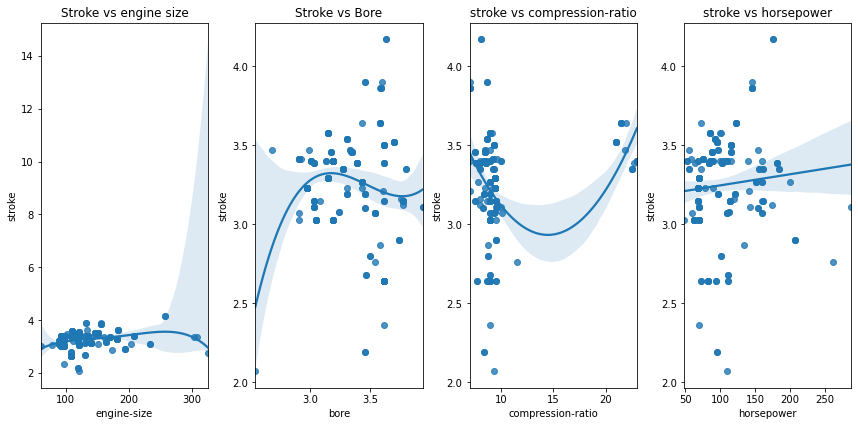

In [23]:
#dealing with nan values in stroke variable

#we use engine size and stroke to look relatiship
#select data with no null stroke size
plot_data = data[data['stroke'].notnull()]
plt.figure(figsize=(12,6))
plt.tight_layout(pad=2, h_pad= 2,w_pad=2)


plt.subplot(1,4,1)
sns.regplot(data=plot_data, x='engine-size',  y = pd.to_numeric(plot_data['stroke']), order =4)
plt.tight_layout(pad=1, h_pad= 1,w_pad=1)
plt.title('Stroke vs engine size')

plt.subplot(1,4,2)
sns.regplot(data = plot_data, x= pd.to_numeric(plot_data['bore']), 
            y=pd.to_numeric(plot_data['stroke']), order =3)
plt.tight_layout(pad=1, h_pad= 1,w_pad=1)
plt.title('Stroke vs Bore')


plt.subplot(1,4,3)
sns.regplot(data = plot_data, x= pd.to_numeric(plot_data['compression-ratio']), 
            y=pd.to_numeric(plot_data['stroke']), order =2)
plt.tight_layout(pad=1, h_pad= 1,w_pad=1)
plt.title(' stroke vs compression-ratio ')

plt.subplot(1,4,4)
sns.regplot(data = plot_data, x= pd.to_numeric(plot_data['horsepower']),
            y=pd.to_numeric(plot_data['stroke']), order =1)
plt.tight_layout(pad=1, h_pad= 1,w_pad=1)                                               
plt.title('stroke vs horsepower')


In [24]:
#from figure above we can see there is good correlation btn strok nd engin size

stroke_cc = data[data['engine-size'].between(60,90)]
Mean_stroke_cc = pd.to_numeric(stroke_cc['stroke']).mean()

#replace nan value in stroke
data['stroke'] = data['stroke'].replace(np.nan, Mean_stroke_cc)



In [25]:
#deal with horse power nan values
data[data['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [28]:
#use horse power and stroke to replac nan values
#select data with stroke 3.9
selected_horse_power_dataf=data[pd.to_numeric(data['stroke']).between(3.5, 3.9)]
mean_horse_power = pd.to_numeric(selected_horse_power_dataf['horsepower']).mean()

#replace nan values in horsepower variables
data['horsepower'] = data['horsepower'].replace(np.nan, mean_horse_power)


In [29]:
#dal with peak rpm
data[data['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [30]:
mean_horse_power

108.80645161290323

In [31]:
peak_horse = data[pd.to_numeric(data['horsepower']).between(115,117)]

rmp_mean= peak_horse['peak-rpm'].mean()
data['peak-rpm'].fillna(rmp_mean, inplace= True)
data[data['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [32]:
#deal with price nan values

data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [33]:
data.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [34]:
#start with Audi
#select all vihecles with body style of hatchback two doors and it is turbo aspiration
turbo_hatchback=data[ (data['aspiration']=='turbo') &
                     (data['num-of-doors']=='two') & 
                     (data['engine-type']=='ohc') &
                     (data['body-style']=='hatchback')]
turbo_hatchback

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
29,3,145,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964
75,1,122,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503
79,1,161,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,157.3,63.8,50.8,2145,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689
80,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2370,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959
82,3,122,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629
83,3,122,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869
84,3,122,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489
119,1,119,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957


In [35]:
turbo_hatchback_mean_price= pd.to_numeric(turbo_hatchback['price']).mean()
#replace nan value of Audi which is at 9

data.at[9, 'price']= turbo_hatchback_mean_price

In [36]:
data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [37]:
#cleaning data for isuzu sedan
#select all vihecles with body style of sedan two doors and it is turbo std 
Isuzu_sedan=data[ (data['aspiration']=='std') &
                     (data['num-of-doors']=='two') & 
                     (data['body-style']=='sedan')&
                     (data['engine-type']=='ohc') ]
                     
Isuzu_sedan_mean = pd.to_numeric(Isuzu_sedan['price']).mean()- pd.to_numeric(Isuzu_sedan['price']).std()
data.at[44, 'price'] = Isuzu_sedan_mean
data.at[45, 'price'] = Isuzu_sedan_mean
#print(Isuzu_sedan_mean)
#pd.to_numeric(Isuzu_sedan['price']).mean()
Isuzu_sedan

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
16,0,122,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,51.0,2293,ohc,four,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
89,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
94,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1951,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299


In [38]:
data[data.make=='isuzu']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,0,122,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,2753.732363
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,2753.732363
46,2,122,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [39]:
data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [40]:
porsche_data =data[data['make']=='porsche']
porschem_mean_price = pd.to_numeric(porsche_data['price']).std() + pd.to_numeric(porsche_data['price']).mean()
porschem_mean_price

37929.28434319897

In [41]:
data.at[129, 'price']= porschem_mean_price

### Part Two
##### data visualization and exploration

In [42]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [43]:
# see which model sold more compered to other models
#Makes_names = list(data['make'].unique())
Makes_names_data =pd.DataFrame(data['make'].value_counts()).reset_index(inplace=False)


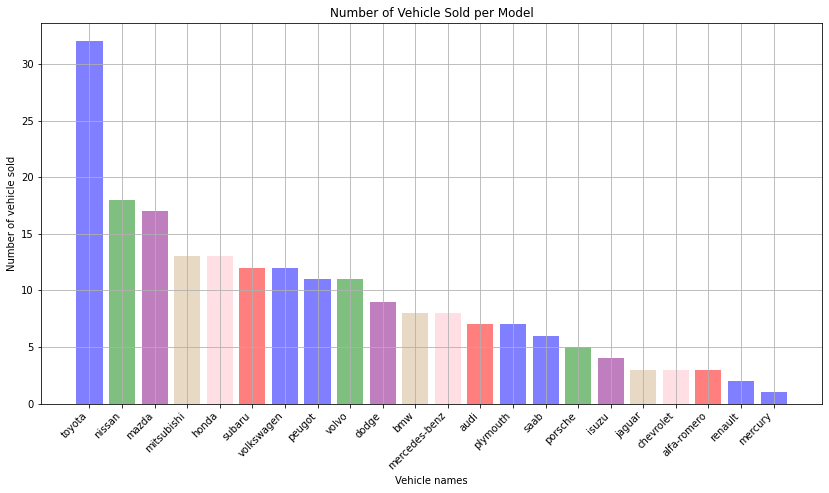

In [44]:
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red', 'blue']
objects_names=list(Makes_names_data['index'])
y_pos =np.arange(len(objects_names))
Number_sold = list(Makes_names_data['make'])

plt.figure(figsize=(14,7))
plt.bar(y_pos, Number_sold, align='center',color=colors,alpha=0.5)
plt.xticks(y_pos, objects_names, rotation =45, ha='right')

plt.xlabel('Vehicle names')
plt.ylabel('Number of vehicle sold')
plt.title('Number of Vehicle Sold per Model')
plt.grid(True)
plt.show()

From graph  we can see, toyota was leading seling model, followed by nissan, then mazda and least seling model is Mercury

In [45]:
#let see which body-style was much prefer
body_style=pd.DataFrame(data['body-style'].value_counts()).reset_index(inplace=False)
body_style.head()

,index,body-style
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


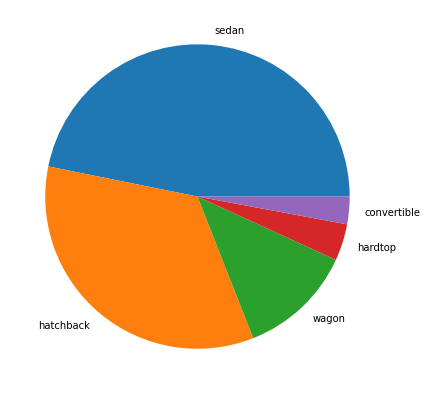

In [46]:
Vehicle_names= list(body_style['index'])
Number_per_body = list(body_style['body-style'])

fig =plt.figure(figsize=(10,7))

#create pie plot
plt.pie(Number_per_body, labels=Vehicle_names)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'toyota'),
  Text(1, 0, 'nissan'),
  Text(2, 0, 'mazda'),
  Text(3, 0, 'mitsubishi'),
  Text(4, 0, 'honda'),
  Text(5, 0, 'subaru'),
  Text(6, 0, 'volkswagen'),
  Text(7, 0, 'peugot'),
  Text(8, 0, 'volvo'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'bmw'),
  Text(11, 0, 'mercedes-benz'),
  Text(12, 0, 'audi'),
  Text(13, 0, 'plymouth'),
  Text(14, 0, 'saab'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'isuzu'),
  Text(17, 0, 'jaguar'),
  Text(18, 0, 'chevrolet'),
  Text(19, 0, 'alfa-romero'),
  Text(20, 0, 'renault'),
  Text(21, 0, 'mercury')])

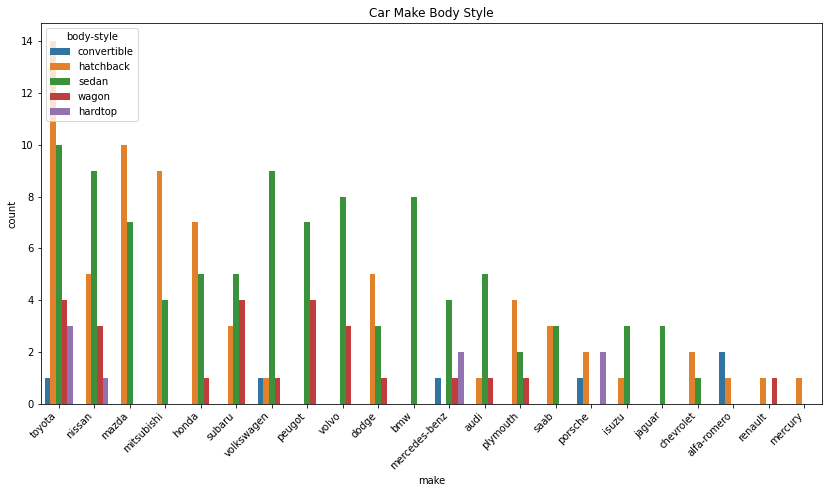

In [47]:
#find relationship between brand and make
plt.figure(figsize=(14,7))
sns.countplot(x='make' , hue="body-style", data=data, 
              order=data['make'].value_counts().index)

plt.title("Car Make Body Style")
plt.xticks(rotation =45, ha='right')

(array([0, 1]), [Text(0, 0, 'std'), Text(1, 0, 'turbo')])

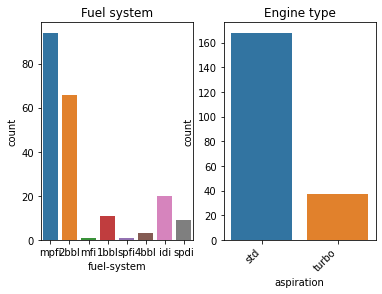

In [48]:
#number of car with relation to engine type and fule type



fig, ax =plt.subplots(1,2)
sns.countplot(x='aspiration', data=data, ax=ax[1]).set_title('Engine type')
plt.xticks(rotation =45, ha='right')

sns.countplot(x='fuel-system', data=data, ax=ax[0]).set_title('Fuel system')
plt.xticks(rotation =45, ha='right')

In [49]:
data['price']=pd.to_numeric(data['price'])

In [50]:
#which Make(Brand) generated more sales in price perspective

Make_total_sales=pd.DataFrame(data.groupby(['make'])['price'].sum()).reset_index(inplace=False)
Make_total_sales.head()

,make,price
0,alfa-romero,46495.0
1,audi,118933.0
2,bmw,208950.0
3,chevrolet,18021.0
4,dodge,70879.0


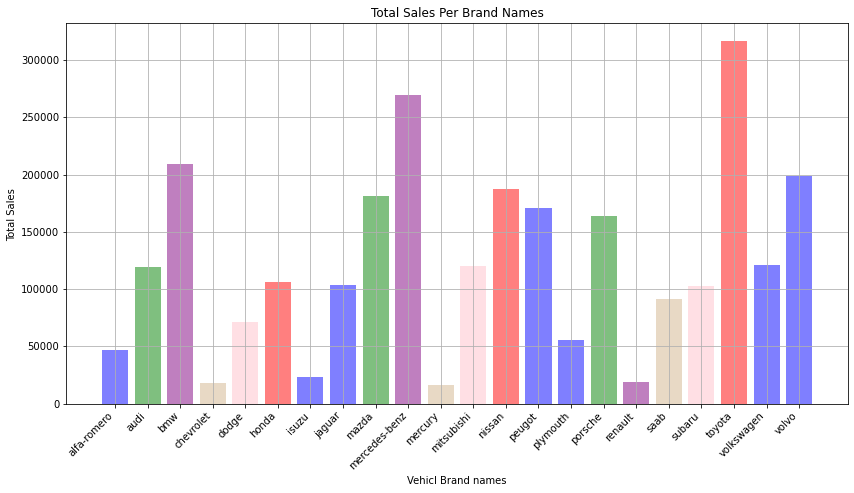

In [51]:
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red', 'blue']


car_names=list(Make_total_sales['make'])
y_pos =np.arange(len(car_names))
Total_sales = Make_total_sales['price']

plt.figure(figsize=(14,7))
plt.bar(y_pos, Total_sales, align='center', color=colors, alpha=0.5)
plt.xticks(y_pos, car_names, rotation =45, ha='right')

plt.xlabel('Vehicl Brand names')
plt.ylabel('Total Sales ')
plt.title('Total Sales Per Brand Names')
plt.grid(True)
plt.show()

In [52]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [53]:
#which body style generate more sales in price perspective

Body_style_sales=pd.DataFrame(data.groupby(['body-style'])['price'].sum()).reset_index(inplace=False)
Body_style_sales.head()

,body-style,price
0,convertible,1.313430e+05
1,hardtop,1.776680e+05
2,hatchback,7.268133e+05
3,sedan,1.364724e+06
4,wagon,3.092990e+05


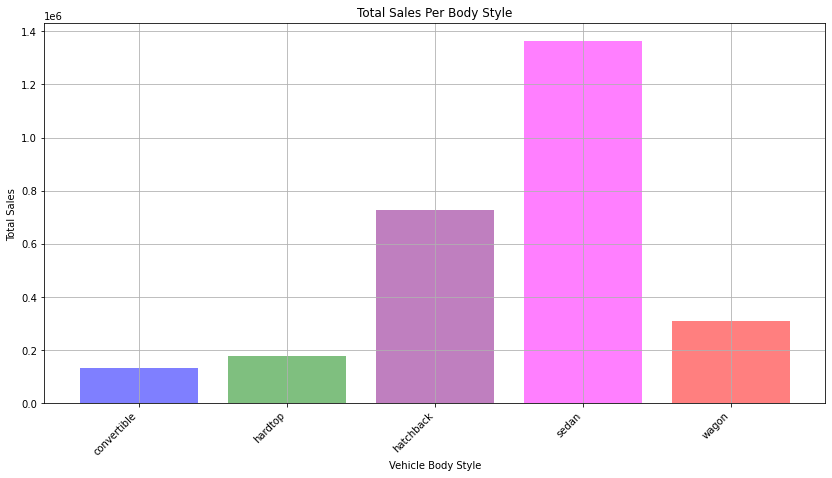

In [54]:
colors = ['blue', 'green', 'purple', 'magenta', 'red', 'red', 'blue']

body_style=list(Body_style_sales['body-style'])
y_pos = np.arange(len(body_style))
sales = Body_style_sales['price']

plt.figure(figsize=(14,7))
plt.bar(y_pos, sales, align='center', color=colors, alpha=0.5)
plt.xticks(y_pos, body_style, rotation =45, ha='right')

plt.xlabel('Vehicle Body Style')
plt.ylabel('Total Sales ')
plt.title('Total Sales Per Body Style')
plt.grid(True)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'mazda'),
  Text(9, 0, 'mercedes-benz'),
  Text(10, 0, 'mercury'),
  Text(11, 0, 'mitsubishi'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'peugot'),
  Text(14, 0, 'plymouth'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'renault'),
  Text(17, 0, 'saab'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'toyota'),
  Text(20, 0, 'volkswagen'),
  Text(21, 0, 'volvo')])

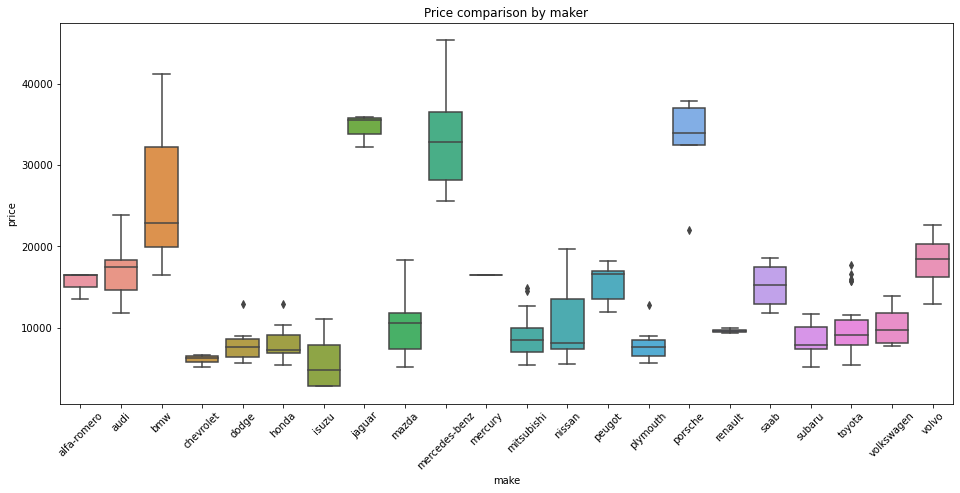

In [55]:
#price comparison by maker
plt.figure(figsize=(16,7))
sns.boxplot(x='make', y='price', data=data).set(title='Price comparison by maker')
plt.xticks(rotation=45)

### part 3
### Modeling-liner regression-price prediction 

In [56]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470.0
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


#for data modeling, w need to do data encoding , change all data into machine learning readable form

In [57]:
M_data= data.drop(['symboling','normalized-losses'],axis=1)
M_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [58]:
#use pand get Dummies
cat_columns = ['make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location',
            'engine-type','num-of-cylinders','fuel-system']

In [59]:
#change all categorical dtat to cat
#M_data=M_data[cat_columns].astype('category')

In [60]:
M_data=pd.get_dummies(M_data, columns=cat_columns, drop_first=True)

In [61]:
M_data.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [62]:
M_data.corr()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
wheel-base,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082,0.572794,0.110017,0.147804,-0.127605,-0.133609,-0.191713,-0.092329,0.214573,-0.087050,0.408210,0.045962,-0.147396,-0.156719,0.453616,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228,-0.308346,0.257611,-0.439635,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662,0.681817,0.149405,0.171120,-0.218994,-0.227400,-0.280778,-0.117767,0.226930,-0.079248,0.347345,0.024751,-0.127248,-0.077149,0.330602,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398,-0.212679,0.234539,-0.385675,0.047292,-0.436269,0.269647,0.219683,-0.508714,0.538370,-0.050989,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218,0.763052,0.246588,0.053412,-0.194068,-0.174349,-0.185212,-0.155429,0.229246,-0.044906,0.485409,0.068451,-0.079518,-0.118727,0.276302,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758,-0.233880,0.300567,-0.197735,0.066360,-0.222308,0.154637,0.060639,-0.472116,0.511149,-0.051698,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
height,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358,0.119996,0.054281,0.090949,-0.066238,-0.182891,-0.051925,-0.086803,-0.129565,-0.045158,0.165354,0.030881,-0.323726,-0.011652,0.337701,-0.135256,-0.170265,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342,-0.284631,0.087311,-0.540286,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curb-weight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465,0.833550,0.088743,0.145028,-0.187364,-0.166769,-0.229843,-0.092904,0.345315,-0.149218,0.442556,0.047776,-0.086990,-0.092690,0.305064,-0.121164,0.102171,-0.006892,0.063495,-0.114888,-0.094786,-0.101966,0.221127,-0.217275,0.324902,-0.190720,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
engine-size,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470,0.873063,0.017231,0.193885,-0.136632,-0.125043,-0.172881,-0.082885,0.451076,-0.173061,0.483128,0.022067,-0.053867,0.0073

In [63]:
#create train and test data
train_data, test_data = train_test_split(M_data, test_size=0.2, random_state=0)

In [64]:
#for Liner regresion we need to have Y anx X data
#we need to predict price from available variable, 
#so Price will be our Y
Y_train_data=train_data.price
y_test_data=test_data.price


#for X data set, we will drop X from Train data set nd test data set
X_train_data= train_data.drop(columns=['price'],axis=1)
x_test_data = test_data.drop(columns=['price'], axis=1)


In [65]:
#make Liner Regression
liner_reg = LinearRegression()
#liner regression takes (x,y)
liner_reg.fit(X_train_data, Y_train_data)

LinearRegression()

In [66]:
#predict values of price
y_predicted = liner_reg.predict(x_test_data)

In [67]:
#printing results
print("Train set Score:{}".format(liner_reg.score(X_train_data, Y_train_data) ))
print("Test Set Score: {}".format(liner_reg.score(x_test_data,y_test_data)))

Train set Score:0.9718543706914856
Test Set Score: -7.628411615900406e+68
